# 2 Accelerating K-Nearest Neighbour Classifier

In [1]:
# Importing ll the necessary libraries
import time                                #Importing Time
import os                                  #Importing OS
import pandas as pd                        #Importing Pandas
import numpy as np                         #Importing Numpy
import matplotlib.pyplot as plt            #Importing Matplotlib
import random                              #Importing Random
from scipy.spatial.distance import pdist   #Importing Scipy pdist

### Load the dataset classification.npy, the dataset consists of over 100 predictors.

In [2]:
with open('classification.npy', 'rb') as f:
    X = np.load(f)
    y = np.load(f)


Normalising the dataset

In [3]:
normalized_dataset = (X - np.average(X)) / (np.std(X))
X = normalized_dataset

Splitting the dataset into training and testting

In [4]:
n, m = X.shape
split = int(0.8 * n)
p = np.random.permutation(n)
X_train = X[p[:split]]
y_train = y[p[:split]]
X_test = X[p[split:]]
y_test = y[p[split:]]
print(" X_Train Shape : ",X_train.shape,"\nX_Test Shape : ",X_test.shape,"\nY_Train Shape : ",y_train.shape,"\nY_test Shape : ",y_test.shape)

 X_Train Shape :  (800, 100) 
X_Test Shape :  (200, 100) 
Y_Train Shape :  (800,) 
Y_test Shape :  (200,)


### Defining all the funtions to calculate distances between two points

#### EUCLIDEAN DISTANCE

In [5]:
def Euclidean_distance(point1 ,point2):
    sum_square = np.sum(np.square(point1 - point2))
    return np.sqrt(sum_square)

#### COSINE SIMILARITY

In [6]:
def cosine_similarity(point1, point2):
    return (np.dot(point1, point2) / (np.sqrt(np.dot(point1, point1)) * np.sqrt(np.dot(point2, point2))))

#### CITY_BLOCK DISTANCE

In [7]:
def cityblock_distance(point1, point2):
  
    result = np.sum([abs(point_1 - point_2) for (point_1, point_2) in zip(point1, point2)])
    return result

#### Accuracy For KNN Classification

In [8]:
def accuracy_knn_classification(predicted_classes ,actual_classes):
    #Checking if the size of both predicted classes and actual classes is same
    if len(predicted_classes) != len(actual_classes):
        raise Exception('The size of both Predicted Classes array and Actual Classes array should be same')
    #Initializing variable to 0
    correct = 0
    #Iterating through all values to match these values
    for i in range(len(predicted_classes)):
        #If values are equal then incrementing the correct variable
        if predicted_classes[i] == actual_classes[i]:
            correct += 1
    #Returning the accuracy as the precentage
    accuracy = (correct / len(predicted_classes))
    return (accuracy * 100)

        1. Implement the following versions of the Nearest Neighbour Classifier

### a) VANILLA KNN ALGORITHM

In [9]:
def predict_class_VanillaKNN(trainX ,trainY ,q ,k,distance):
    distance_array = np.zeros(shape=(len(trainX) ,))
    #Iterating through all rows of the train X rows for calculating the distance measure
    if distance == "Euclidean":
        for index, observation in enumerate(trainX):
            distance_array[index] = Euclidean_distance(q ,observation)
    elif distance == "Cosine":
        for index, observation in enumerate(trainX):
            distance_array[index] = cosine_similarity(q ,observation)
    elif distance == "City Block":
        for index, observation in enumerate(trainX):
            distance_array[index] = cityblock_distance(q ,observation)
    #Extracting the k nearest rows based on distance value
    k_min_distance = np.argsort(distance_array)[:k]
    #Getting the classes of these nearest rows
    k_nearest_class = trainY[k_min_distance]
    #The predicted class is then the maximum occuring class
    values, counts = np.unique(k_nearest_class.ravel(), return_counts=True)
    predicted_class = values[np.argmax(counts)]
    #Returning the Predicted class
    return predicted_class

        2. Experiment with k = [1, 2, 3, 4, 5, 7] for Vanilla Knn and report your accuracy on the test set. Furthermore Report the runtime.
        3. Experiment with distance=[cosine,euclidean,cityblock]

Accuracy for k =  1  is:  55.00000000000001
 Runtime For  1  Nearest Neighbours is :	 0.7657620906829834


Accuracy for k =  2  is:  50.5
 Runtime For  2  Nearest Neighbours is :	 0.7640841007232666


Accuracy for k =  3  is:  55.00000000000001
 Runtime For  3  Nearest Neighbours is :	 0.7641582489013672


Accuracy for k =  4  is:  59.0
 Runtime For  4  Nearest Neighbours is :	 0.7658138275146484


Accuracy for k =  5  is:  61.0
 Runtime For  5  Nearest Neighbours is :	 0.7616889476776123


Accuracy for k =  6  is:  59.0
 Runtime For  6  Nearest Neighbours is :	 0.7586648464202881


Accuracy for k =  7  is:  60.0
 Runtime For  7  Nearest Neighbours is :	 0.7621660232543945




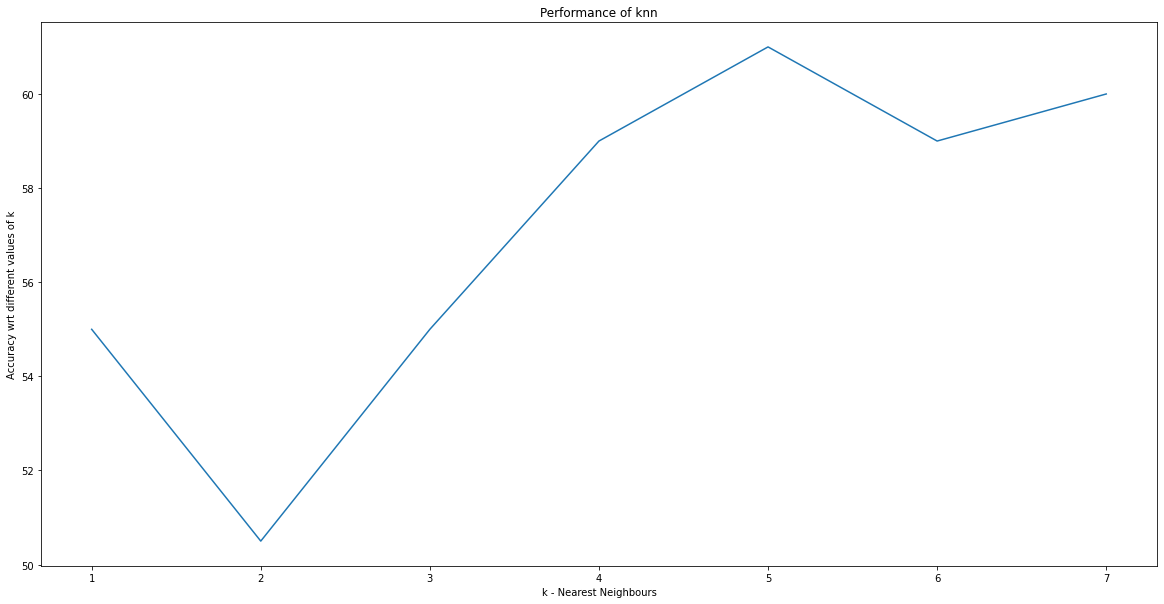

Accuracy for k = 3 and with COSINE SIMILARITY is:  60.0
Accuracy for k = 3 and with CITY BLOCK DISTANCE is:  60.0


In [10]:
#Creating a accuracy matrix which will contain the accuracy for each combination of K classification and K Imputation
accuracies = []
ks = range(1,8)
#Iterating through different values of K for KNN Classification, Picking K from [1,2,3,4,5]
for k in ks:
    start = time.time()
    #Creating an array to store the predicated classes for validation set
    predicted_class_val = []
    #Iterating through each observation in the Validation set
    for x_val in X_test:
        #Predicting the class of validation row using the specific K and Train set
        pred_class = predict_class_VanillaKNN(X_train, y_train, x_val, k,"Euclidean")
        #Appending the predicted class to the created array
        predicted_class_val.append(pred_class)

    #Now calculating the total accuracy of the Validation set
    accuracy = accuracy_knn_classification(predicted_class_val, y_test.ravel())
    print("Accuracy for k = ",k," is: ", accuracy)
    accuracies.append(accuracy)
    end = time.time()
    print(" Runtime For ",k," Nearest Neighbours is :\t",(end-start))
    print("\n")

# Visualize accuracy vs. k
plt.figure(figsize=(20,10))
# fig, ax = plt.subplots()
plt.plot(ks, accuracies)
plt.xlabel("k - Nearest Neighbours")
plt.ylabel("Accuracy wrt different values of k")       
plt.title("Performance of knn") 
plt.show()

predicted_class_val1 = []
    #Iterating through each observation in the Validation set
for x_val in X_test:
    #Predicting the class of validation row using the specific K and Train set
    pred_class1 = predict_class_VanillaKNN(X_train, y_train, x_val, 3,distance ="Cosine")
    #Appending the predicted class to the created array
    predicted_class_val1.append(pred_class)

#Now calculating the total accuracy of the Validation set
accuracy = accuracy_knn_classification(predicted_class_val, y_test.ravel())
print("Accuracy for k = 3 and with COSINE SIMILARITY is: ", accuracy)

predicted_class_val2 = []
    #Iterating through each observation in the Validation set
for x_val in X_test:
    #Predicting the class of validation row using the specific K and Train set
    pred_class2 = predict_class_VanillaKNN(X_train, y_train, x_val, 3,distance ="City Block")
    #Appending the predicted class to the created array
    predicted_class_val2.append(pred_class)

#Now calculating the total accuracy of the Validation set
accuracy = accuracy_knn_classification(predicted_class_val, y_test.ravel())
print("Accuracy for k = 3 and with CITY BLOCK DISTANCE is: ", accuracy)

### b) PARTIAL DISTANCE OR LOWER BOUND ALGORITHM

In [11]:
def predict_class_partialDistance(trainX,trainY, query, k,distance_metric):

    #Creating an array to store distances of k nearest neighbours
    distance_array_k = np.zeros(shape=(k,), dtype='i,i')
    
    if distance_metric == "Cosine":
        #Iterating first through the first K rows to find the nearest neighbour to the quering row
        for index, row in enumerate(trainX[:k,:]):
            distance_array_k[index] = (index, cosine_similarity(query ,row))
        #Sorting the distance array based on distance so that we can check for better neighbour later
        distance_array_k = sorted(distance_array_k, key=lambda x:x[1])
        #Now Iterating through all rows after first K rows
        for index, row in enumerate(trainX[k:,:]):
            #Initializing variable for distance and taken features
            distance = 0
            m = 1  
            #we have to iterate until we have calculate the distance with respect to every feature and the calculated distance is smaller than previous
            while m < trainX.shape[1] & distance <  cosine_similarity(query[:m], row[:m]):  
                #Adding the distance to the variable
                distance += np.sum(np.square(query[:m] , row[:m]))
                #Incrementing the variable m which indicates that in next iteration we have to take one more feature for calculating distance
                m += 1
            #Checking if our calculated distance is better than the distance calculated before with all features
            if distance < cosine_similarity(query ,row):
                #If yes, than appending that row to our K nearest neighbour distance array
                temp_arr = distance_array_k.copy()
                temp_arr.append((index,distance))
                # print('temp arr: ', temp_arr)
                temp_arr = sorted(temp_arr, key=lambda x:x[1])
                # print('Sorted temp arr: ', temp_arr)
                distance_array_k = temp_arr[:-1]
    
    elif distance_metric == "Euclidean":
        for index, row in enumerate(trainX[:k,:]):
            distance_array_k[index] = (index, Euclidean_distance(query ,row)) 
        #Sorting the distance array based on distance so that we can check for better neighbour later
        distance_array_k = sorted(distance_array_k, key=lambda x:x[1])
        #Now Iterating through all rows after first K rows
        for index, row in enumerate(trainX[k:,:]):
            #Initializing variable for distance and taken features
            distance = 0
            m = 1
            #we have to iterate until we have calculate the distance with respect to every feature and the calculated distance is smaller than previous
            while m < trainX.shape[1] & distance <  Euclidean_distance(query[:m], row[:m]):
                #Adding the distance to the variable
                distance += np.sum(np.square(query[:m] , row[:m]))
                #Incrementing the variable m which indicates that in next iteration we have to take one more feature for calculating distance
                m += 1
            #Checking if our calculated distance is better than the distance calculated before with all features
            if distance < Euclidean_distance(query ,row):
                #If yes, than appending that row to our K nearest neighbour distance array
                temp_arr = distance_array_k.copy()
                temp_arr.append((index,distance))
                # print('temp arr: ', temp_arr)
                temp_arr = sorted(temp_arr, key=lambda x:x[1])
                # print('Sorted temp arr: ', temp_arr)
                distance_array_k = temp_arr[:-1]
    
    elif distance_metric == "City Block":   
        for index, row in enumerate(trainX[:k,:]):
            distance_array_k[index] = (index, cityblock_distance(query ,row))
        #Sorting the distance array based on distance so that we can check for better neighbour later
        distance_array_k = sorted(distance_array_k, key=lambda x:x[1])
        #Now Iterating through all rows after first K rows
        for index, row in enumerate(trainX[k:,:]):
            #Initializing variable for distance and taken features
            distance = 0
            m = 1
            #we have to iterate until we have calculate the distance with respect to every feature and the calculated distance is smaller than previous
            while m < trainX.shape[1] & distance <  cityblock_distance(query[:m], row[:m]):
                #Adding the distance to the variable
                distance += np.sum(np.square(query[:m] , row[:m]))
                #Incrementing the variable m which indicates that in next iteration we have to take one more feature for calculating distance
                m += 1                
            #Checking if our calculated distance is better than the distance calculated before with all features
            if distance < cityblock_distance(query ,row):
                #If yes, than appending that row to our K nearest neighbour distance array
                temp_arr = distance_array_k.copy()
                temp_arr.append((index,distance))
                # print('temp arr: ', temp_arr)
                temp_arr = sorted(temp_arr, key=lambda x:x[1])
                # print('Sorted temp arr: ', temp_arr)
                distance_array_k = temp_arr[:-1]
    
    #Getting the classes of these nearest rows
    k_nearest_class = trainY[[i[0] for i in distance_array_k]]
    #The predicted class is then the maximum occuring class
    values, counts = np.unique(k_nearest_class, return_counts=True)
    predicted_class = values[np.argmax(counts)]    
    #Returning the Predicted class
    return predicted_class  

        2. Experiment with k = [1, 2, 3, 4, 5, 7] for Partial Distance Knn and report your accuracy on the test set. Furthermore Report the runtime.
        3. Experiment with distance=[cosine,euclidean,cityblock]

Accuracy for k =  1  is:  30.5
 Runtime For  7  Nearest Neighbours is :	 0.9131240844726562


Accuracy for k =  2  is:  31.5
 Runtime For  7  Nearest Neighbours is :	 0.920386791229248


Accuracy for k =  3  is:  31.5
 Runtime For  7  Nearest Neighbours is :	 0.9395110607147217


Accuracy for k =  4  is:  31.5
 Runtime For  7  Nearest Neighbours is :	 0.9489710330963135


Accuracy for k =  5  is:  31.5
 Runtime For  7  Nearest Neighbours is :	 0.9550080299377441


Accuracy for k =  6  is:  31.5
 Runtime For  7  Nearest Neighbours is :	 0.9642748832702637


Accuracy for k =  7  is:  31.5
 Runtime For  7  Nearest Neighbours is :	 0.9698669910430908




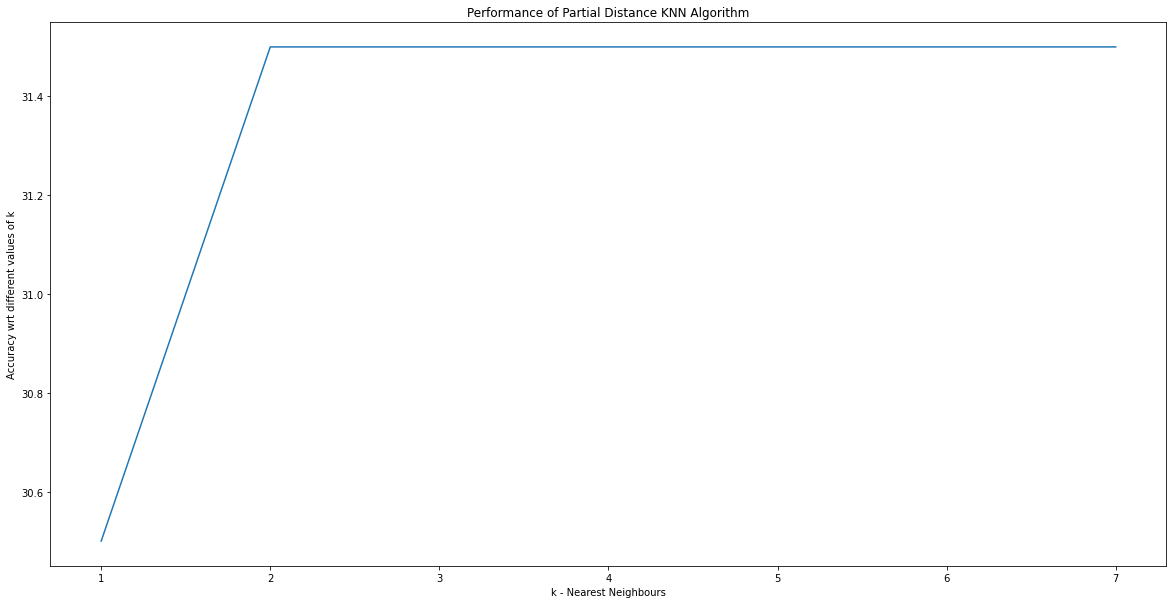

Accuracy for k = 3 and with COSINE SIMILARITY is:  31.5
Accuracy for k = 3 and with CITY BLOCK DISTANCE is:  31.5


In [12]:
#Creating a accuracy matrix which will contain the accuracy for each combination of K classification and K Imputation
accuracies = []
ks = range(1,8)
#Iterating through different values of K for KNN Classification, Picking K from [1,2,3,4,5]
for k_classification in range(1, 8):
    start = time.time()
    #Creating an array to store the predicated classes for validation set
    predicted_class_val = []
    #Iterating through each observation in the Validation set
    for x_val in X_test:
        #Predicting the class of validation row using the specific K and Train set
        pred_class = predict_class_partialDistance(X_train, y_train, x_val, k_classification,"Euclidean")
        #Appending the predicted class to the created array
        predicted_class_val.append(pred_class)

    #Now calculating the total accuracy of the Validation set
    accuracy = accuracy_knn_classification(predicted_class_val, y_test.ravel())
    print("Accuracy for k = ",k_classification," is: ", accuracy)
    accuracies.append(accuracy)
    end = time.time()
    print(" Runtime For ",k," Nearest Neighbours is :\t",(end-start))
    print("\n")

# Visualize accuracy vs. k
plt.figure(figsize=(20,10))
# fig, ax = plt.subplots()
plt.plot(ks, accuracies)
plt.xlabel("k - Nearest Neighbours")
plt.ylabel("Accuracy wrt different values of k")       
plt.title("Performance of Partial Distance KNN Algorithm") 
plt.show()

## PARTIAL DISTANCE ALGORITHM USING COSINE SIMILARITY MEASURE
predicted_class_val1 = []
    #Iterating through each observation in the Validation set
for x_val in X_test:
    #Predicting the class of validation row using the specific K and Train set
    pred_class1 = predict_class_partialDistance(X_train, y_train, x_val, 3,distance_metric ="Cosine")
    #Appending the predicted class to the created array
    predicted_class_val1.append(pred_class)

#Now calculating the total accuracy of the Validation set
accuracy = accuracy_knn_classification(predicted_class_val, y_test.ravel())
print("Accuracy for k = 3 and with COSINE SIMILARITY is: ", accuracy)


## PARTIAL DISTANCE ALGORITHM USING CITY BLOCK MEASURE
predicted_class_val2 = []
    #Iterating through each observation in the Validation set
for x_val in X_test:
    #Predicting the class of validation row using the specific K and Train set
    pred_class2 = predict_class_partialDistance(X_train, y_train, x_val, 3,distance_metric ="City Block")
    #Appending the predicted class to the created array
    predicted_class_val2.append(pred_class)

#Now calculating the total accuracy of the Validation set
accuracy = accuracy_knn_classification(predicted_class_val, y_test.ravel())
print("Accuracy for k = 3 and with CITY BLOCK DISTANCE is: ", accuracy)

### c) LOCALITY SENSITIVE HASHING ALGORITHM

In [13]:
def Get_Hash_Values(random_vector, observation):
    #For each value of dot product, we will check if the value is greater than 0 or not and appending it as a string
    hash_value = ''.join((np.dot(random_vector, observation) > 0).astype('int').astype('str'))
    #Returning the final hash value
    return hash_value

In [14]:
def Generate_HastTable(trainX, k):
    #Creating k different Random vectors to denote k different hyperplanes
    random_vectors = np.random.randn(k,len(trainX[0]))
    #Creating and Initializing an empty hash table to store my hash values for training rows
    hashtable = [] 
    ##Iterating through all training rows and storing there hash values in the hash table
    for index , row in enumerate(trainX):
        #Calculating hash value of training row using Get_Hash_Values
        hashvalue = Get_Hash_Values(random_vectors, row)
        #Appending the hash value to the hash table
        hashtable.append(hashvalue) 
    #Returning the hash table and the random vectors
    return hashtable , random_vectors

In [15]:
def locally_sensitive_hashing(trainX, trainY, validationX, k):
    #Creating and Populating Hash tables for training data and Creating the random vectors for Hashing
    hashtable, random_vectors = Generate_HastTable(trainX, k)
    #Creating and Initializing an empty array to store the predicted classes for the validation set
    predicted_classes_val = []
    #Iterating through all the rows in Validation set to Predict there classes
    for index, val_row in enumerate(validationX):
        #Calculating the hash value of the validation row
        val_hash = Get_Hash_Values(random_vectors, val_row)
        #Initializing the predicted class variable with None
        val_predicted_class = None
        try:
            #Searching the hash table to find the index with the same hash value as the validation row
            train_index = hashtable.index(val_hash)
            #Extracting the class of training row which is close to the validation found using hash table
            val_predicted_class = trainY[train_index]
        except:
            #Assiging class to infinity since we were not able find the class using LSH method
            val_predicted_class = np.iinfo(np.int32).max    
        #Appending the predicted class to the array
        predicted_classes_val.append(val_predicted_class)    
    #Returning the predicted class array
    return predicted_classes_val, hashtable

        2. Experiment with k = [1, 2, 3, 4, 5, 7] for Locality Sensitive Hashing Knn and report your accuracy on the test set. Furthermore Report the runtime.

Accuracy for k =  1  is:  34.0
 Runtime For  1  Nearest Neighbours is :	 0.01065373420715332


Accuracy for k =  2  is:  37.0
 Runtime For  2  Nearest Neighbours is :	 0.011725902557373047


Accuracy for k =  3  is:  36.0
 Runtime For  3  Nearest Neighbours is :	 0.008214950561523438


Accuracy for k =  4  is:  37.5
 Runtime For  4  Nearest Neighbours is :	 0.010743141174316406


Accuracy for k =  5  is:  40.5
 Runtime For  5  Nearest Neighbours is :	 0.010493993759155273


Accuracy for k =  6  is:  33.0
 Runtime For  6  Nearest Neighbours is :	 0.009041309356689453


Accuracy for k =  7  is:  42.0
 Runtime For  7  Nearest Neighbours is :	 0.009888887405395508




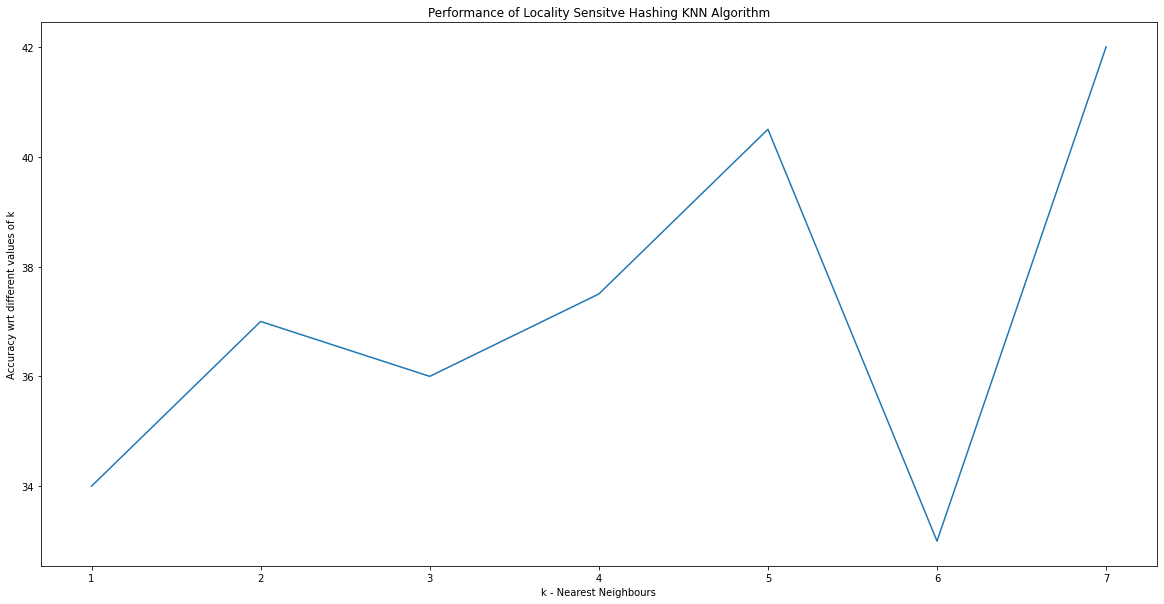

In [16]:
#Creating a accuracy matrix which will contain the accuracy for each combination of K classification and K Imputation
accuracies = []
ks = range(1,8)
#Iterating through different values of K for KNN Classification, Picking K from [1,2,3,4,5]
for k in ks:
    start = time.time()
    #Creating an array to store the predicated classes for validation set
    predicted_class_val = []
    #Predicting the class of validation row using the specific K and Train set
    predicted_class_val, hashtable = locally_sensitive_hashing(X_train, y_train, X_test, k)
    #Now calculating the total accuracy of the Validation set
    accuracy = accuracy_knn_classification(predicted_class_val, y_test.ravel())
    print("Accuracy for k = ",k," is: ", accuracy)
    #Saving the accuracy in our Accuracy Matrix for current Combination
    accuracies.append(accuracy)
    end = time.time()
    print(" Runtime For ",k," Nearest Neighbours is :\t",(end-start))
    print("\n")

# Visualize accuracy vs. k
plt.figure(figsize=(20,10))
# fig, ax = plt.subplots()
plt.plot(ks, accuracies)
plt.xlabel("k - Nearest Neighbours")
plt.ylabel("Accuracy wrt different values of k")       
plt.title("Performance of Locality Sensitve Hashing KNN Algorithm") 
plt.show()

#### 4. How is the NN algorithm different from the algorithms we have studied so far?

Other Machine Learning Algorithms compute the weight factors that conveys which features are the dominant predictors. NN Algorith does not require any correlations (linear relationship) between features and target variable, which is a requirement for Regression Algorithms . NN is slow to implement as it relies on calculating the distance between all vector instances, which can be very time-consuming for large datasets with hundreds of features and thousands of observations.